## K-means clustering

*  K centroids are randomly initialized
* Observations are assigned to the closest centroid
* Centroid is moved to the center of the members
* Repeat steps 2 and 3 until no observation changes membership in step 2

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html  

http://shabal.in/visuals/kmeans/1.html  

**Example 1:**

### Working with well known IRIS dataset

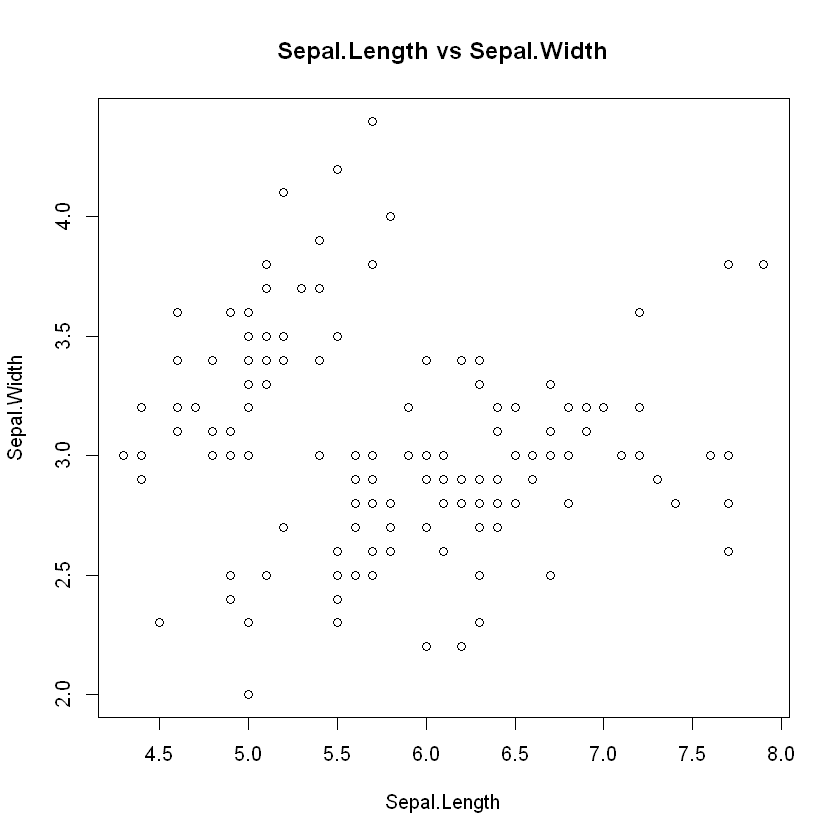

In [3]:
data<-read.csv("data/iris_Only_Sepal.csv")

plot(data[c("Sepal.Length", "Sepal.Width")], main="Sepal.Length vs Sepal.Width")

#### standardising the data

In [5]:
mydata <- scale(data)
# for first value it would calculate like (5.1 - mean(data$Sepal.Length))/sd(data$Sepal.Length) 

#### Decide the Optimal Number of Clusters

http://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters/  
https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set  

[1] 298.000000 165.838698 101.944436  88.787416  71.525836  56.853604
 [7]  46.220136  38.425439  36.185896  27.835757  23.585762  31.066233
[13]  21.234873  18.363339  17.314924  15.891217  15.840751  14.394263
[19]  12.116045  12.227123  11.428309  10.021365  10.594784  10.331725
[25]   9.438185

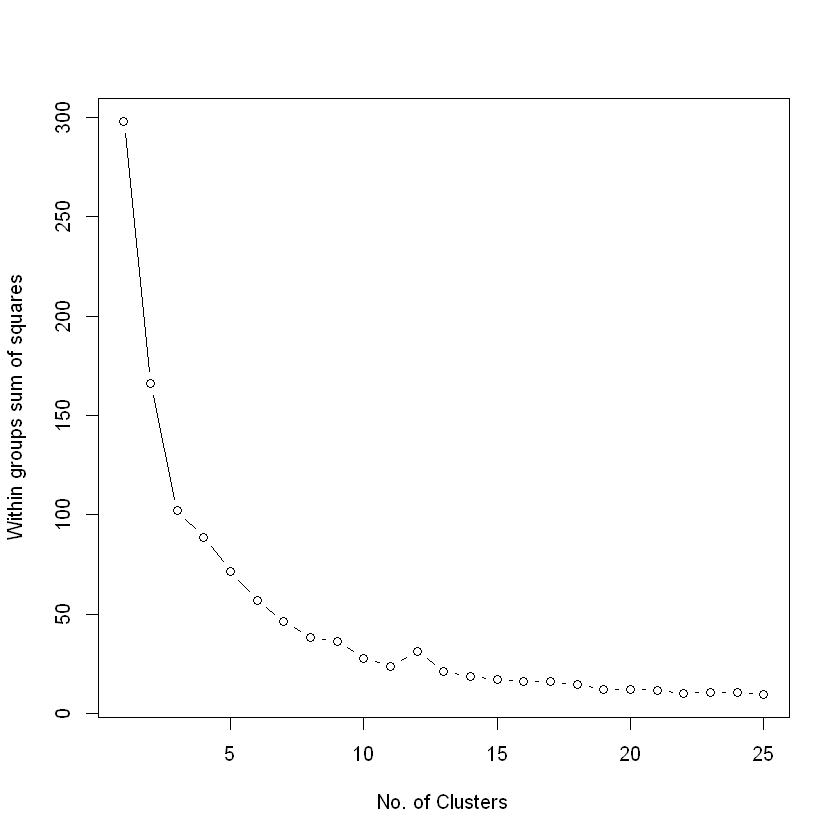

In [6]:
wss <- (nrow(data)-1)*sum(apply(data,2,var))

for(i in 1:25){wss[i] <- sum(kmeans(mydata, centers=i)$withinss)}

plot(1:25, wss, type="b", xlab="No. of Clusters", ylab="Within groups sum of squares")

wss

### Running Clustering Algorithm(trying with 4 clusters)

K-means clustering with 4 clusters of sizes 41, 32, 53, 24

Cluster means:
  Sepal.Length Sepal.Width
1     6.880488    3.097561
2     5.187500    3.637500
3     5.924528    2.750943
4     4.766667    2.891667

Clustering vector:
  [1] 2 4 4 4 2 2 4 2 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 4 4 2 2 2 4 4 2
 [38] 2 4 2 2 4 4 2 2 4 2 4 2 2 1 1 1 3 1 3 1 4 1 4 4 3 3 3 3 1 3 3 3 3 3 3 3 3
 [75] 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 4 3 3 3 3 4 3 1 3 1 3 1 1 4 1 1 1 1
[112] 3 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 3 1 1 1 3 3 3 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 3 3

Within cluster sum of squares by cluster:
[1] 10.634146  4.630000  8.250566  4.451667
 (between_SS / total_SS =  78.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Group.1,Sepal.Length,Sepal.Width
1,6.880488,3.097561
2,5.187500,3.637500
3,5.924528,2.750943
4,4.766667,2.891667


groups
 1  2  3  4 
41 32 53 24 

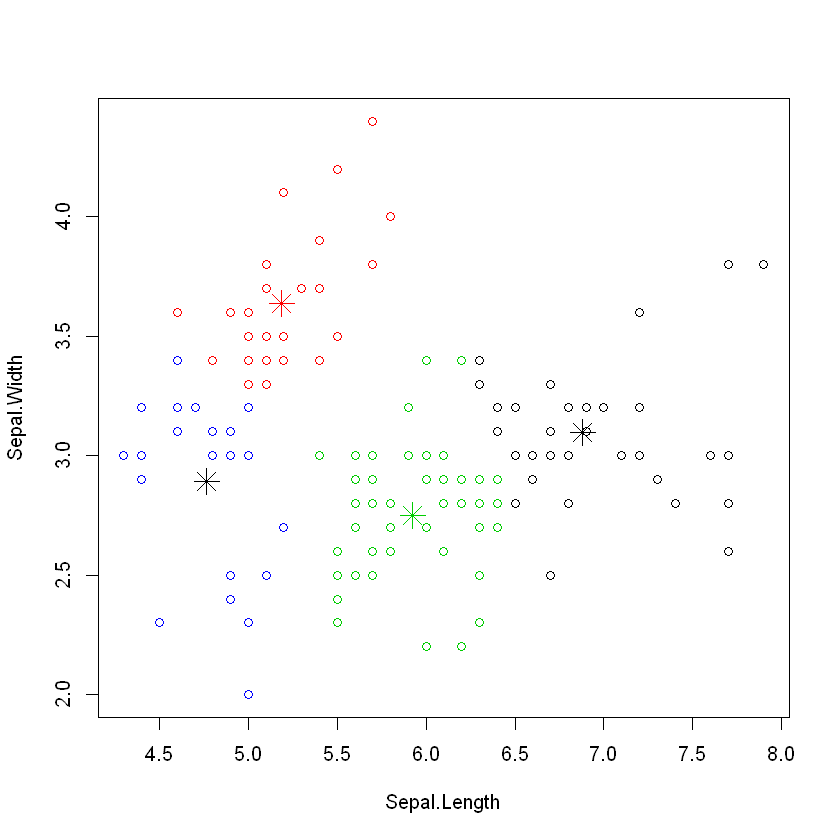

In [7]:
clus4 <- kmeans(data, centers=4, nstart=30)

#check between_SS / total_SS
clus4

# get cluster means 
aggregate(data ,by=list(clus4$cluster), FUN=mean)

# append cluster assignment
data <- data.frame(data, clus4$cluster)

#summary
groups <- data.frame(clus4$cluster)
table(groups)

plot(data[c("Sepal.Length", "Sepal.Width")], col=clus4$cluster)
points(clus4$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=2)

#### trying with 3 clusters

K-means clustering with 3 clusters of sizes 32, 77, 41

Cluster means:
  Sepal.Length Sepal.Width clus4.cluster
1     5.187500    3.637500      2.000000
2     5.563636    2.794805      3.311688
3     6.880488    3.097561      1.000000

Clustering vector:
  [1] 1 2 2 2 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 [38] 1 2 1 1 2 2 1 1 2 1 2 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 3 2 3 3 3 3
[112] 2 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 2 3 3 3 2 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 2 2

Within cluster sum of squares by cluster:
[1]  4.63000 51.69558 10.63415
 (between_SS / total_SS =  77.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Group.1,Sepal.Length,Sepal.Width,clus4.cluster
1,5.187500,3.637500,2.000000
2,5.563636,2.794805,3.311688
3,6.880488,3.097561,1.000000


groups
 1  2  3 
32 77 41 

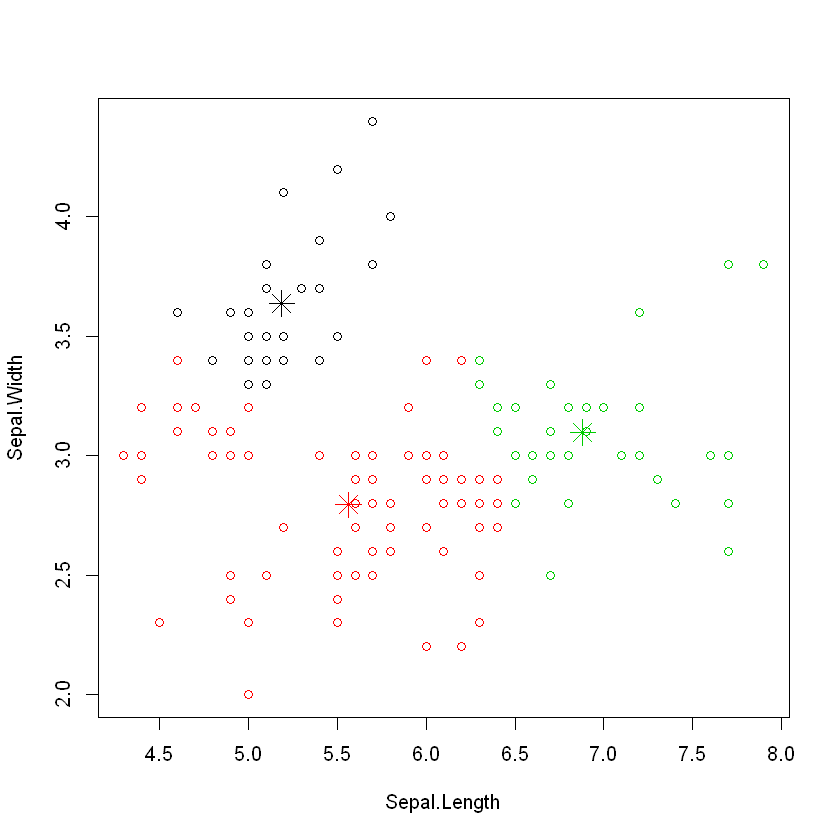

In [8]:
clus3 <- kmeans(data, centers=3, nstart=20)
clus3

# get cluster means 
aggregate(data ,by=list(clus3$cluster), FUN=mean)

# append cluster assignment
data <- data.frame(data, clus3$cluster)

#summary
groups <- data.frame(clus3$cluster)
table(groups)

plot(data[c("Sepal.Length", "Sepal.Width")], col=clus3$cluster)
points(clus3$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=2)

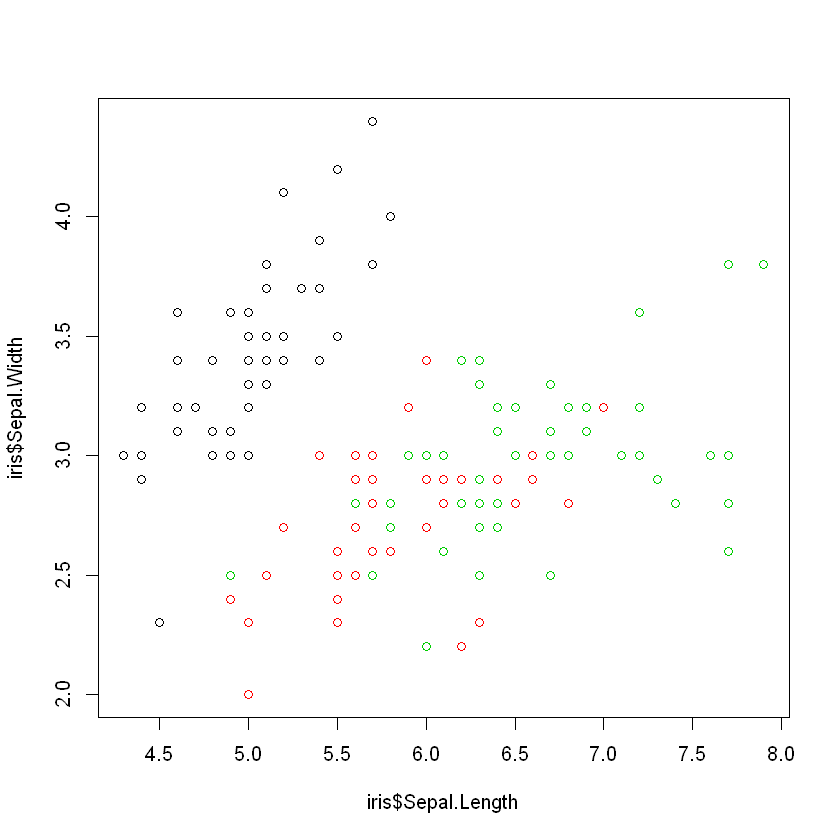

In [9]:
# check our original iris 
plot(iris$Sepal.Length, iris$Sepal.Width, col=iris$Species)

**Example 2:**

In [22]:
install.packages('rattle')
install.packages('cluster')

package 'rattle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpaWA1A6\downloaded_packages
package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpaWA1A6\downloaded_packages


In [ ]:
library('rattle')
library('cluster')

Warning message:
"Failed to load RGtk2 dynamic library, attempting to install it."Please install GTK+ from http://ftp.gnome.org/pub/gnome/binaries/win64/gtk+/2.22/gtk+-bundle_2.22.1-20101229_win64.zip
If the package still does not load, please ensure that GTK+ is installed and that it is on your PATH environment variable
IN ANY CASE, RESTART R BEFORE TRYING TO LOAD THE PACKAGE AGAIN


In [23]:
data(wine, package='rattle')
head(wine)

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [33]:
wine.f  <- wine

In [34]:
wine.f$Type <- NULL

In [35]:
head(wine.f)

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Observations:

* observe the composition of different wines
* set of observations (x1,x2,.,xn), where each observation is a d-dimensional real vector, 

### Aim: 

To partition the n observations into (k≤n) S={S1,S2,.,Sk} so as to minimize the within-cluster sum of squares (WCSS). In other words, its objective is to find:: argminS∑i=1k∑xj∈Si∥xj−μi∥2 where μi is the mean of points in Si. 

The clustering optimization problem is solved with the function kmeans in R.

In [36]:
wine.stand <- scale(wine.f[-1])  # To standarize the variables

In [37]:
head(wine.stand)

Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939
-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635
0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370
-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680
0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747
-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072


### Applying K-Means function

In [38]:
k.means.fit <- kmeans(wine.stand, 3) # k = 3
# In k.means.fit are contained all the elements of the cluster output:

print(attributes(k.means.fit))

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"



In [ ]:
k.means.fit$centers

In [ ]:
k.means.fit$cluster

In [43]:
k.means.fit$size

[1] 58 51 69

In [42]:
table(wine$Type,k.means.fit$cluster)

   
     1  2  3
  1  0  0 59
  2 58  3 10
  3  0 48  0

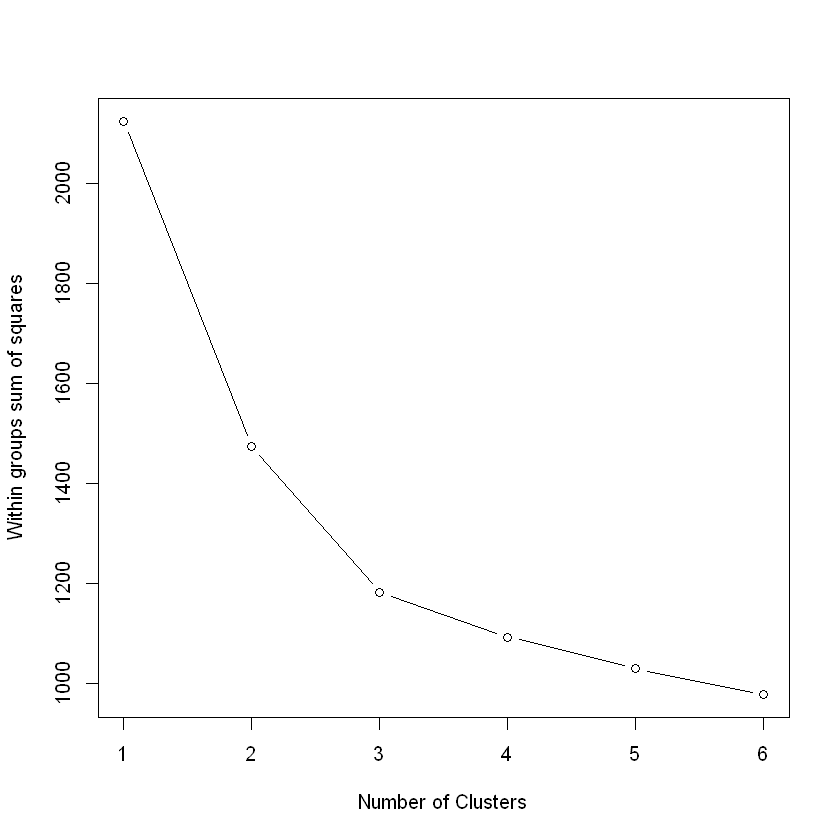

In [45]:
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",ylab="Within groups sum of squares")}
       

wssplot(wine.stand, nc=6) 
# plot of chunk unnamed-chunk-4

   Which is the optimal value for k in this case? Why?
   
Library clusters allow us to represent (with the aid of PCA) the cluster solution into 2 dimensions:

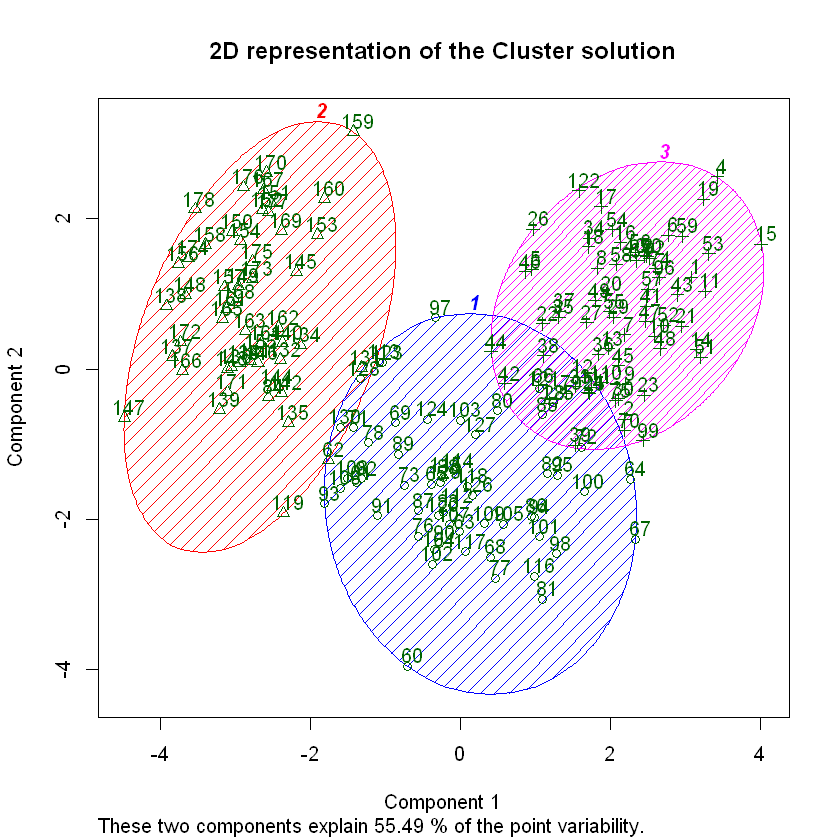

In [46]:
library(cluster)
clusplot(wine.stand, k.means.fit$cluster, main='2D representation of the Cluster solution',
         color=TRUE, shade=TRUE,
         labels=2, lines=0)

plot of chunk unnamed-chunk-5
In order to evaluate the clustering performance we build a confusion matrix:

In [47]:
table(wine[,1],k.means.fit$cluster)

   
     1  2  3
  1  0  0 59
  2 58  3 10
  3  0 48  0

## Hierarchical clustering

Hierarchical methods use a distance matrix as an input for the clustering algorithm. The choice of an appropriate metric will influence the shape of the clusters, as some elements may be close to one another according to one distance and farther away according to another.

In [48]:
d <- dist(wine.stand, method = "euclidean") # Euclidean distance matrix.

In [ ]:
We use the Euclidean distance as an input for the clustering algorithm (Ward’s minimum variance criterion minimizes the total within-cluster variance):

In [52]:
H.fit <- hclust(d, method="ward.D2")

## The "ward" method has been renamed to "ward.D"; note new "ward.D2"
The clustering output can be displayed in a dendrogram

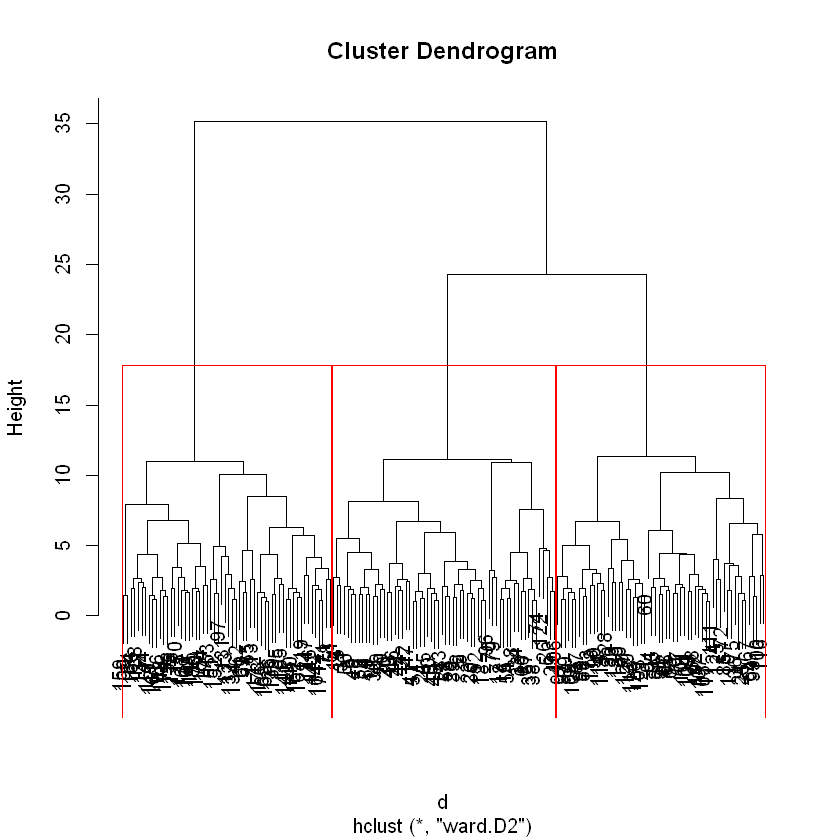

In [53]:
plot(H.fit) # display dendogram
groups <- cutree(H.fit, k=3) # cut tree into 5 clusters
# draw dendogram with red borders around the 5 clusters
rect.hclust(H.fit, k=3, border="red") 

In [54]:
table(wine[,1],groups)

   groups
     1  2  3
  1 56  3  0
  2  6 55 10
  3  0  0 48